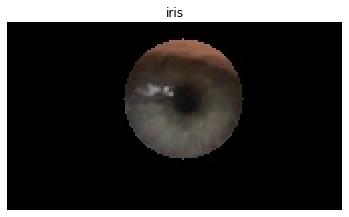

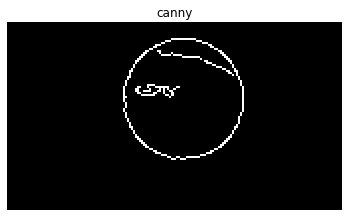

AARG


In [14]:
import cv2
from M3 import m3Show
from matplotlib import pyplot as plt

iris = cv2.imread("iris.jpeg")
m3Show.imshow(iris, "iris")
c = cv2.Canny(iris, 100,200)
m3Show.imshow(c, "canny")
print("AARG")